# CodeClause Data Science Intern

# Name : Ramesh Jagannath Devkar

# Task 2 : Covid Analysis

# Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

# Importing the dataset

In [2]:
df = pd.read_csv('Covid Live.csv')

In [3]:
df.head()

,#,"Country,\nOther",Total\nCases,Total\nDeaths,New\nDeaths,Total\nRecovered,Active\nCases,"Serious,\nCritical",Tot Cases/\n1M pop,Deaths/\n1M pop,Total\nTests,Tests/\n1M pop,Population
0,1,USA,"98,166,904","1,084,282",NaN,"94,962,112","2,120,510","2,970","293,206","3,239","1,118,158,870","3,339,729","334,805,269"
1,2,India,"44,587,307","528,629",NaN,"44,019,095","39,583",698,"31,698",376,"894,416,853","635,857","1,406,631,776"
2,3,France,"35,342,950","155,078",NaN,"34,527,115","660,757",869,"538,892","2,365","271,490,188","4,139,547","65,584,518"
3,4,Brazil,"34,706,757","686,027",NaN,"33,838,636","182,094","8,318","161,162","3,186","63,776,166","296,146","215,353,593"
4,5,Germany,"33,312,373","149,948",NaN,"32,315,200","847,225","1,406","397,126","1,788","122,332,384","1,458,359","83,883,596"


In [4]:
df = df.rename(columns = {'Country,\nOther':'Country/Other','Total\nCases':'Total Cases','Total\nDeaths':'Total Deaths','New\nDeaths':'New Deaths','Total\nRecovered':'Total Recovered','Active\nCases':'Active Cases','Serious,\nCritical':'Serious/Critical','Tot Cases/\n1M pop':'Tot Cases/1M pop','Deaths/\n1M pop':'Deaths/1M pop','Total\nTests':'Total Tests','Tests/\n1M pop':'Tests/1M pop'})

In [5]:
df.describe()

,#,New Deaths
count,230.000000,3.0
mean,115.500000,18.0
std,66.539462,21.0
min,1.000000,3.0
25%,58.250000,6.0
50%,115.500000,9.0
75%,172.750000,25.5
max,230.000000,42.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   #                 230 non-null    int64  
 1   Country/Other     230 non-null    object 
 2   Total Cases       230 non-null    object 
 3   Total Deaths      225 non-null    object 
 4   New Deaths        3 non-null      float64
 5   Total Recovered   214 non-null    object 
 6   Active Cases      215 non-null    object 
 7   Serious/Critical  147 non-null    object 
 8   Tot Cases/1M pop  228 non-null    object 
 9   Deaths/1M pop     223 non-null    object 
 10  Total Tests       214 non-null    object 
 11  Tests/1M pop      214 non-null    object 
 12  Population        228 non-null    object 
dtypes: float64(1), int64(1), object(11)
memory usage: 23.5+ KB


# Removing 'New Deaths' column

In [7]:
df.columns

Index(['#', 'Country/Other', 'Total Cases', 'Total Deaths', 'New Deaths',
       'Total Recovered', 'Active Cases', 'Serious/Critical',
       'Tot Cases/1M pop', 'Deaths/1M pop', 'Total Tests', 'Tests/1M pop',
       'Population'],
      dtype='object')

In [8]:
df = df.drop(['New Deaths'],axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   #                 230 non-null    int64 
 1   Country/Other     230 non-null    object
 2   Total Cases       230 non-null    object
 3   Total Deaths      225 non-null    object
 4   Total Recovered   214 non-null    object
 5   Active Cases      215 non-null    object
 6   Serious/Critical  147 non-null    object
 7   Tot Cases/1M pop  228 non-null    object
 8   Deaths/1M pop     223 non-null    object
 9   Total Tests       214 non-null    object
 10  Tests/1M pop      214 non-null    object
 11  Population        228 non-null    object
dtypes: int64(1), object(11)
memory usage: 21.7+ KB


# Changing the type of the columns

In [10]:
cols = ['Total Cases', 'Total Deaths',
       'Total Recovered', 'Active Cases', 'Serious/Critical',
       'Tot Cases/1M pop', 'Deaths/1M pop', 'Total Tests', 'Tests/1M pop',
       'Population']
df[cols] = df[cols].apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',',''), errors='coerce'))
#had to use this way to change the type of columns as the object string contained a ',' in between numbers


# Rechecking our dataset

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   #                 230 non-null    int64  
 1   Country/Other     230 non-null    object 
 2   Total Cases       230 non-null    int64  
 3   Total Deaths      225 non-null    float64
 4   Total Recovered   214 non-null    float64
 5   Active Cases      215 non-null    float64
 6   Serious/Critical  147 non-null    float64
 7   Tot Cases/1M pop  228 non-null    float64
 8   Deaths/1M pop     223 non-null    float64
 9   Total Tests       214 non-null    float64
 10  Tests/1M pop      214 non-null    float64
 11  Population        228 non-null    float64
dtypes: float64(9), int64(2), object(1)
memory usage: 21.7+ KB


All the columns are in numeric format now, let's check if it shows the description of other columns now.

In [13]:
df.describe()

,#,Total Cases,Total Deaths,Total Recovered,Active Cases,Serious/Critical,Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
count,230.000000,2.300000e+02,2.250000e+02,2.140000e+02,2.150000e+02,147.000000,228.000000,223.000000,2.140000e+02,2.140000e+02,2.280000e+02
mean,115.500000,2.705969e+06,2.909820e+04,2.807255e+06,5.744895e+04,270.224490,179621.846491,1197.968610,3.137011e+07,2.050888e+06,3.484620e+07
std,66.539462,8.779899e+06,1.022137e+05,8.815291e+06,2.073823e+05,922.698201,182372.507626,1246.991628,1.144561e+08,3.490517e+06,1.389233e+08
min,1.000000,9.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,1.000000,16.000000,2.000000,5.117000e+03,5.091000e+03,7.990000e+02
25%,58.250000,2.364900e+04,2.020000e+02,1.968325e+04,1.320000e+02,4.500000,16932.500000,157.500000,3.462602e+05,1.807408e+05,5.170965e+05
50%,115.500000,2.037110e+05,2.179000e+03,2.250110e+05,1.246000e+03,18.000000,117976.000000,777.000000,2.172044e+06,8.717415e+05,5.816378e+06
75%,172.750000,1.256286e+06,1.412200e+04,1.437441e+06,1.923950e+04,101.000000,293122.750000,1953.000000,1.267585e+07,2.345814e+06,2.254928e+07
max,230.000000,9.816690e+07,1.084282e+06,9.496211e+07,2.120510e+06,8318.000000,703959.000000,6429.000000,1.118159e+09,2.200494e+07,1.448471e+09


In [15]:
df.shape

(230, 12)

There are 230 rows and 12 columns

In [16]:
df.isnull().sum()

#                    0
Country/Other        0
Total Cases          0
Total Deaths         5
Total Recovered     16
Active Cases        15
Serious/Critical    83
Tot Cases/1M pop     2
Deaths/1M pop        7
Total Tests         16
Tests/1M pop        16
Population           2
dtype: int64

# Visualizing the missing values

<AxesSubplot:>

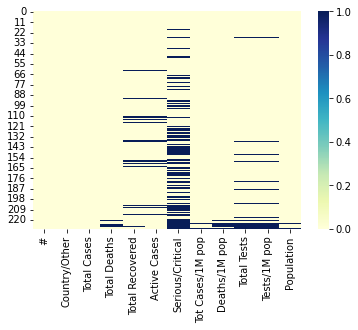

In [17]:
sns.heatmap(df.isnull(), cmap = "YlGnBu") 

# Cleaning the data

In [18]:
df = df.dropna(subset=['Total Deaths','Tot Cases/1M pop','Deaths/1M pop','Population'])

In [19]:
df.isnull().sum()

#                    0
Country/Other        0
Total Cases          0
Total Deaths         0
Total Recovered     15
Active Cases        15
Serious/Critical    76
Tot Cases/1M pop     0
Deaths/1M pop        0
Total Tests         10
Tests/1M pop        10
Population           0
dtype: int64

# Calculating outliers to check whether to apply mean or median, and filling values accordingly:

# For Series "db['Serious/Critical']":

In [20]:
upper = np.nanquantile(df['Serious/Critical'], 0.75)
lower = np.nanquantile(df['Serious/Critical'], 0.25)
iqr = upper - lower
upperThresh = upper + 1.5 * iqr
lowerThresh = lower - 1.5 * iqr
df[(df['Serious/Critical']< lowerThresh) | (df['Serious/Critical'] > upperThresh)].shape
#there are 20 outliers in total

(20, 12)

Visualization of outliers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Serious/Critical'>

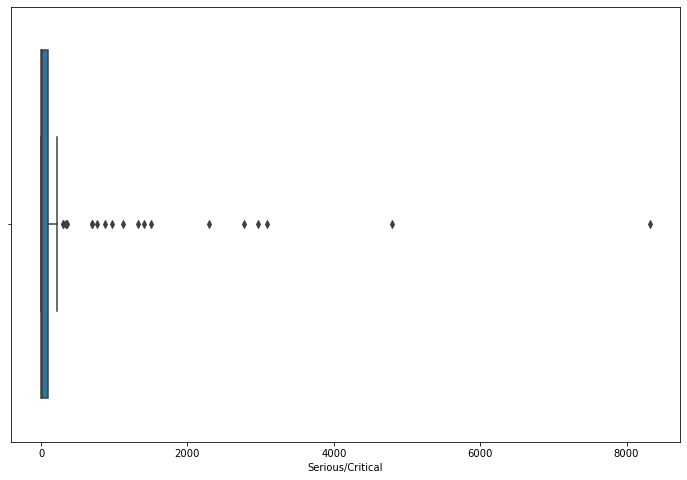

In [21]:
fig, ax = plt.subplots(figsize=(12 ,8))
sns.boxplot(df['Serious/Critical'])

In [22]:
median = np.median(df['Serious/Critical'].dropna())
#Checking coefficient of skewness
sk = 3*(np.mean(df['Serious/Critical'])-median)/np.std(df['Serious/Critical'])
sk

0.8228697033315754

Visualization of skewness

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Serious/Critical', ylabel='Density'>

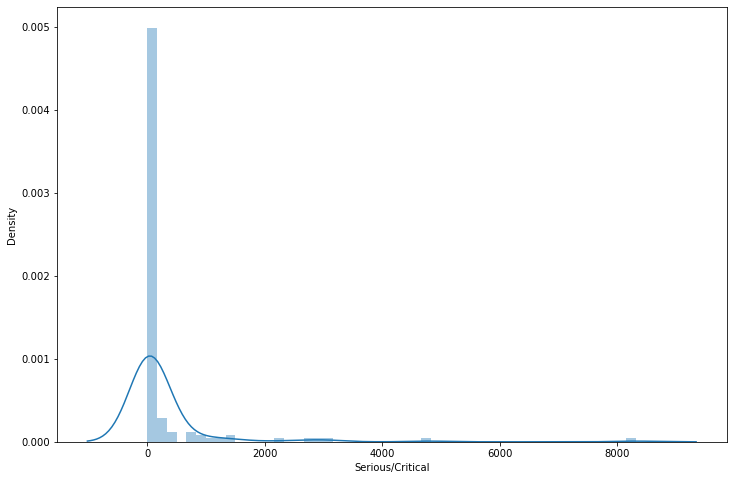

In [23]:
fig, ax = plt.subplots(figsize=(12 ,8))
sns.distplot(df['Serious/Critical'])

# Conclusion regarding Series "db['Serious/Critical']"

In [24]:
df['Serious/Critical'] = df['Serious/Critical'].fillna(median)

# For Series "db['Total Recovered']"

In [25]:
upper = np.nanquantile(df['Total Recovered'], 0.75)
lower = np.nanquantile(df['Total Recovered'], 0.25)
iqr = upper - lower
upperThresh = upper + 1.5 * iqr
lowerThresh = lower - 1.5 * iqr
df[(df['Total Recovered']< lowerThresh) | (df['Total Recovered'] > upperThresh)].shape
#there are 38 outliers in total

(38, 12)

Visualization of outliers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total Recovered'>

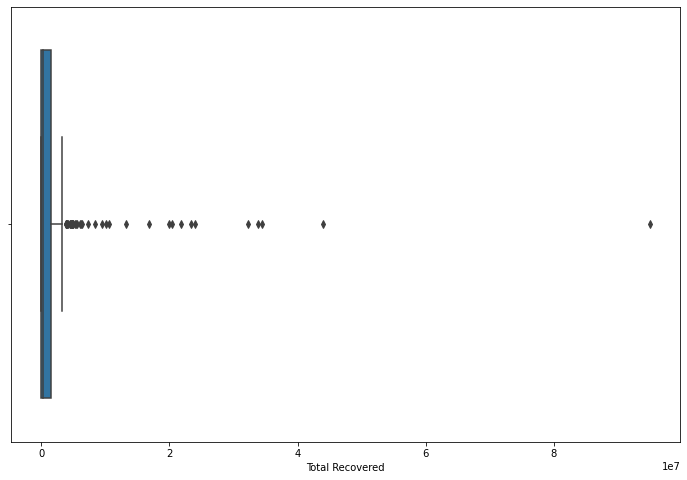

In [26]:
fig, ax = plt.subplots(figsize=(12 ,8))
sns.boxplot(df['Total Recovered'])

In [27]:
median1 = np.median(df['Total Recovered'].dropna())
#Checking coefficient of skewness
sk = 3*(np.mean(df['Total Recovered'])-median1)/np.std(df['Total Recovered'])
sk

0.8896276524583444

Visualization of skewness

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total Recovered', ylabel='Density'>

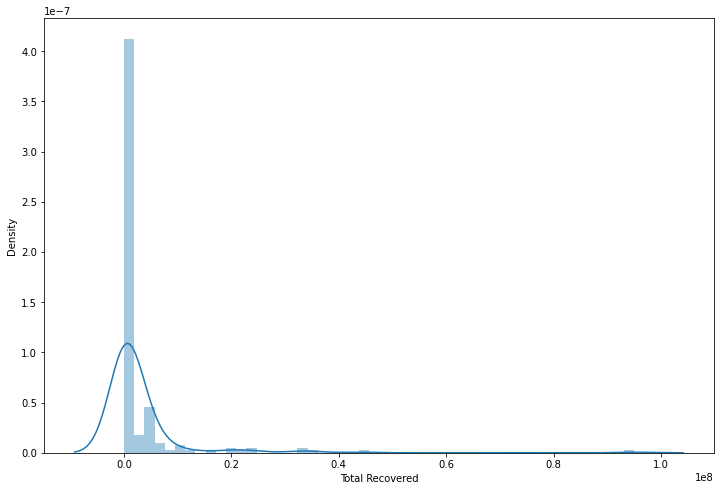

In [28]:
fig, ax = plt.subplots(figsize=(12 ,8))
sns.distplot(df['Total Recovered'])

# Conclusion regarding Series "db['Total Recovered']"

In [29]:
df['Total Recovered'] = df['Total Recovered'].fillna(median1)

# For Series "db['Active Cases']"

In [30]:
upper = np.nanquantile(df['Active Cases'], 0.75)
lower = np.nanquantile(df['Active Cases'], 0.25)
iqr = upper - lower
upperThresh = upper + 1.5 * iqr
lowerThresh = lower - 1.5 * iqr
df[(df['Active Cases']< lowerThresh) | (df['Active Cases'] > upperThresh)].shape
#there are 32 outliers in total

(32, 12)

Visualization of outliers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Active Cases'>

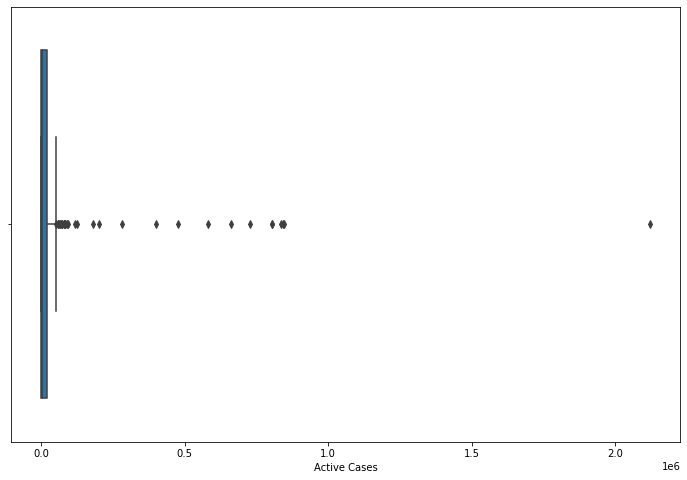

In [31]:
fig, ax = plt.subplots(figsize=(12 ,8))
sns.boxplot(df['Active Cases'])

In [32]:
median2 = np.median(df['Active Cases'].dropna())
#Checking coefficient of skewness
sk = 3*(np.mean(df['Active Cases'])-median2)/np.std(df['Active Cases'])
sk

0.8276631562981045

Visualization of skewness

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Active Cases', ylabel='Density'>

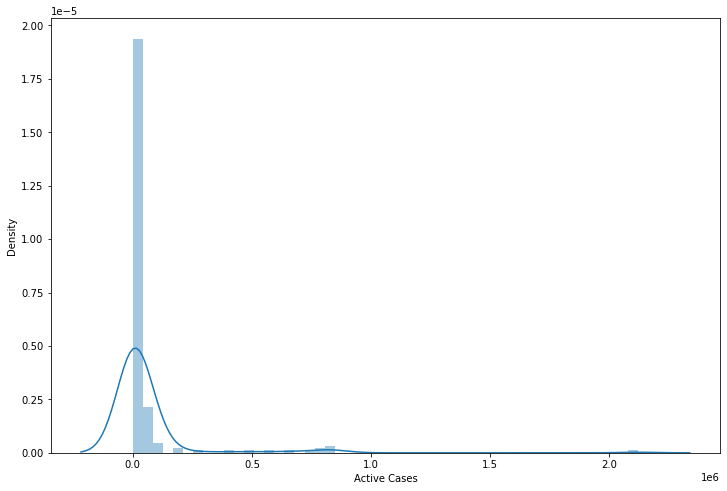

In [33]:
fig, ax = plt.subplots(figsize=(12 ,8))
sns.distplot(df['Active Cases'])

# Conclusion regarding Series "db['Active Cases']"

In [34]:
df['Active Cases'] = df['Active Cases'].fillna(median2)

For Series "db['Total Tests']"

In [35]:
upper = np.nanquantile(df['Total Tests'], 0.75)
lower = np.nanquantile(df['Total Tests'], 0.25)
iqr = upper - lower
upperThresh = upper + 1.5 * iqr
lowerThresh = lower - 1.5 * iqr
df[(df['Total Tests']< lowerThresh) | (df['Total Tests'] > upperThresh)].shape
#there are 34 outliers in total

(34, 12)

Visualization of outliers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total Tests'>

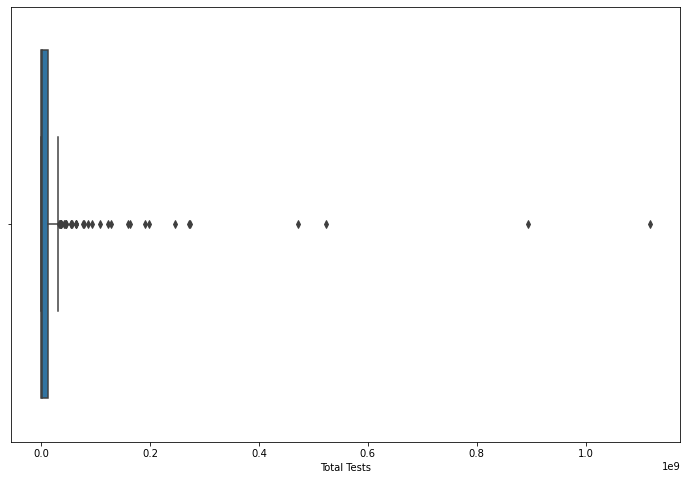

In [36]:
fig, ax = plt.subplots(figsize=(12 ,8))
sns.boxplot(df['Total Tests'])

In [37]:
median3 = np.median(df['Total Tests'].dropna())
#Checking coefficient of skewness
sk = 3*(np.mean(df['Total Tests'])-median3)/np.std(df['Total Tests'])
sk

0.7682082265834373

Visualization of skewness

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total Tests', ylabel='Density'>

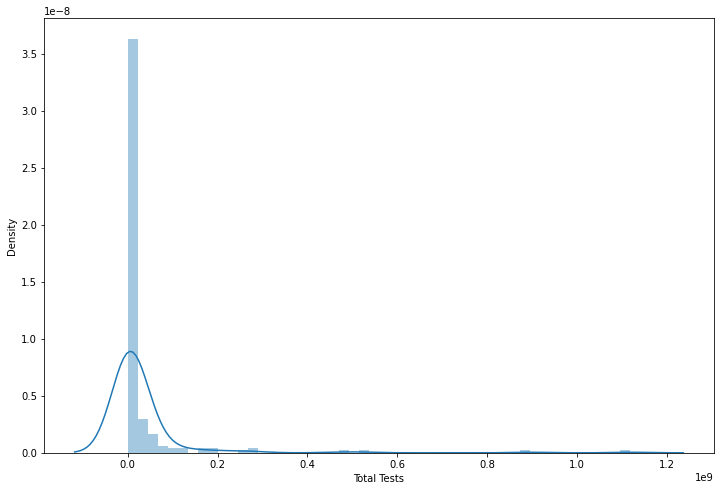

In [38]:
fig, ax = plt.subplots(figsize=(12 ,8))
sns.distplot(df['Total Tests'])

# Conclusion regarding Series "db['Total Tests']"

In [39]:
df['Total Tests'] = df['Total Tests'].fillna(median3)

For Series "df['Tests/1M pop']"

In [40]:
upper = np.nanquantile(df['Tests/1M pop'], 0.75)
lower = np.nanquantile(df['Tests/1M pop'], 0.25)
iqr = upper - lower
upperThresh = upper + 1.5 * iqr
lowerThresh = lower - 1.5 * iqr
df[(df['Tests/1M pop']< lowerThresh) | (df['Tests/1M pop'] > upperThresh)].shape
#there are 17 outliers in total

(17, 12)

Visualization of outliers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Tests/1M pop'>

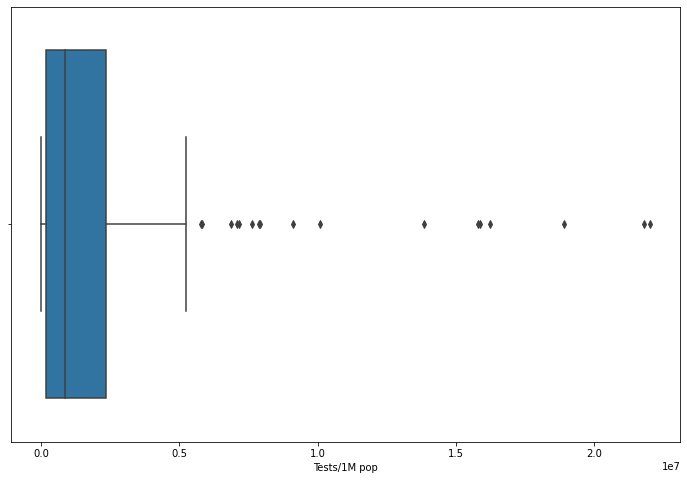

In [41]:
fig, ax = plt.subplots(figsize=(12 ,8))
sns.boxplot(df['Tests/1M pop'])

In [42]:
median4 = np.median(df['Tests/1M pop'].dropna())
#Checking coefficient of skewness
sk = 3*(np.mean(df['Tests/1M pop'])-median4)/np.std(df['Tests/1M pop'])
sk

1.0156872422819632

Visualization of skewness

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Tests/1M pop', ylabel='Density'>

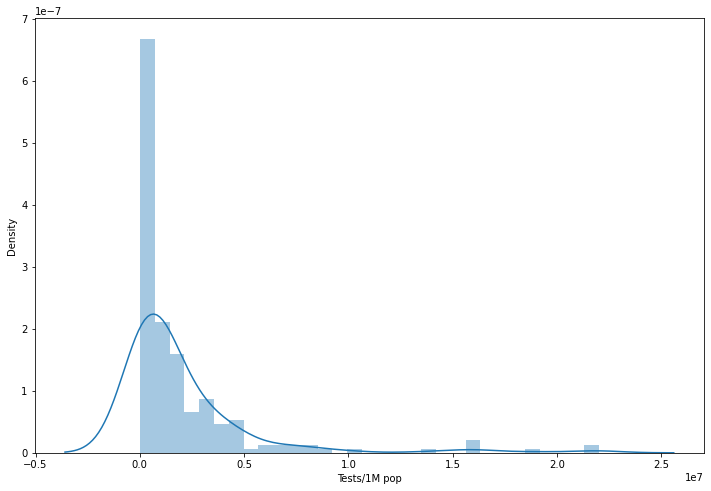

In [43]:
fig, ax = plt.subplots(figsize=(12 ,8))
sns.distplot(df['Tests/1M pop'])

# Conclusion regarding Series "df['Tests/1M pop']"

In [44]:
df['Tests/1M pop'] = df['Tests/1M pop'].fillna(median4)

In [45]:
df.isnull().sum()

#                   0
Country/Other       0
Total Cases         0
Total Deaths        0
Total Recovered     0
Active Cases        0
Serious/Critical    0
Tot Cases/1M pop    0
Deaths/1M pop       0
Total Tests         0
Tests/1M pop        0
Population          0
dtype: int64

# Visualization

<AxesSubplot:>

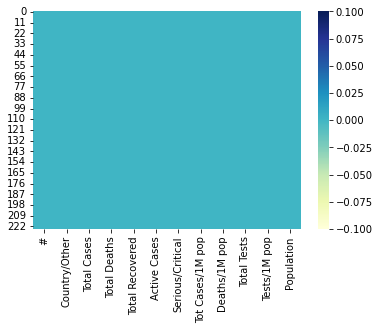

In [46]:
sns.heatmap(df.isnull(), cmap = "YlGnBu") 

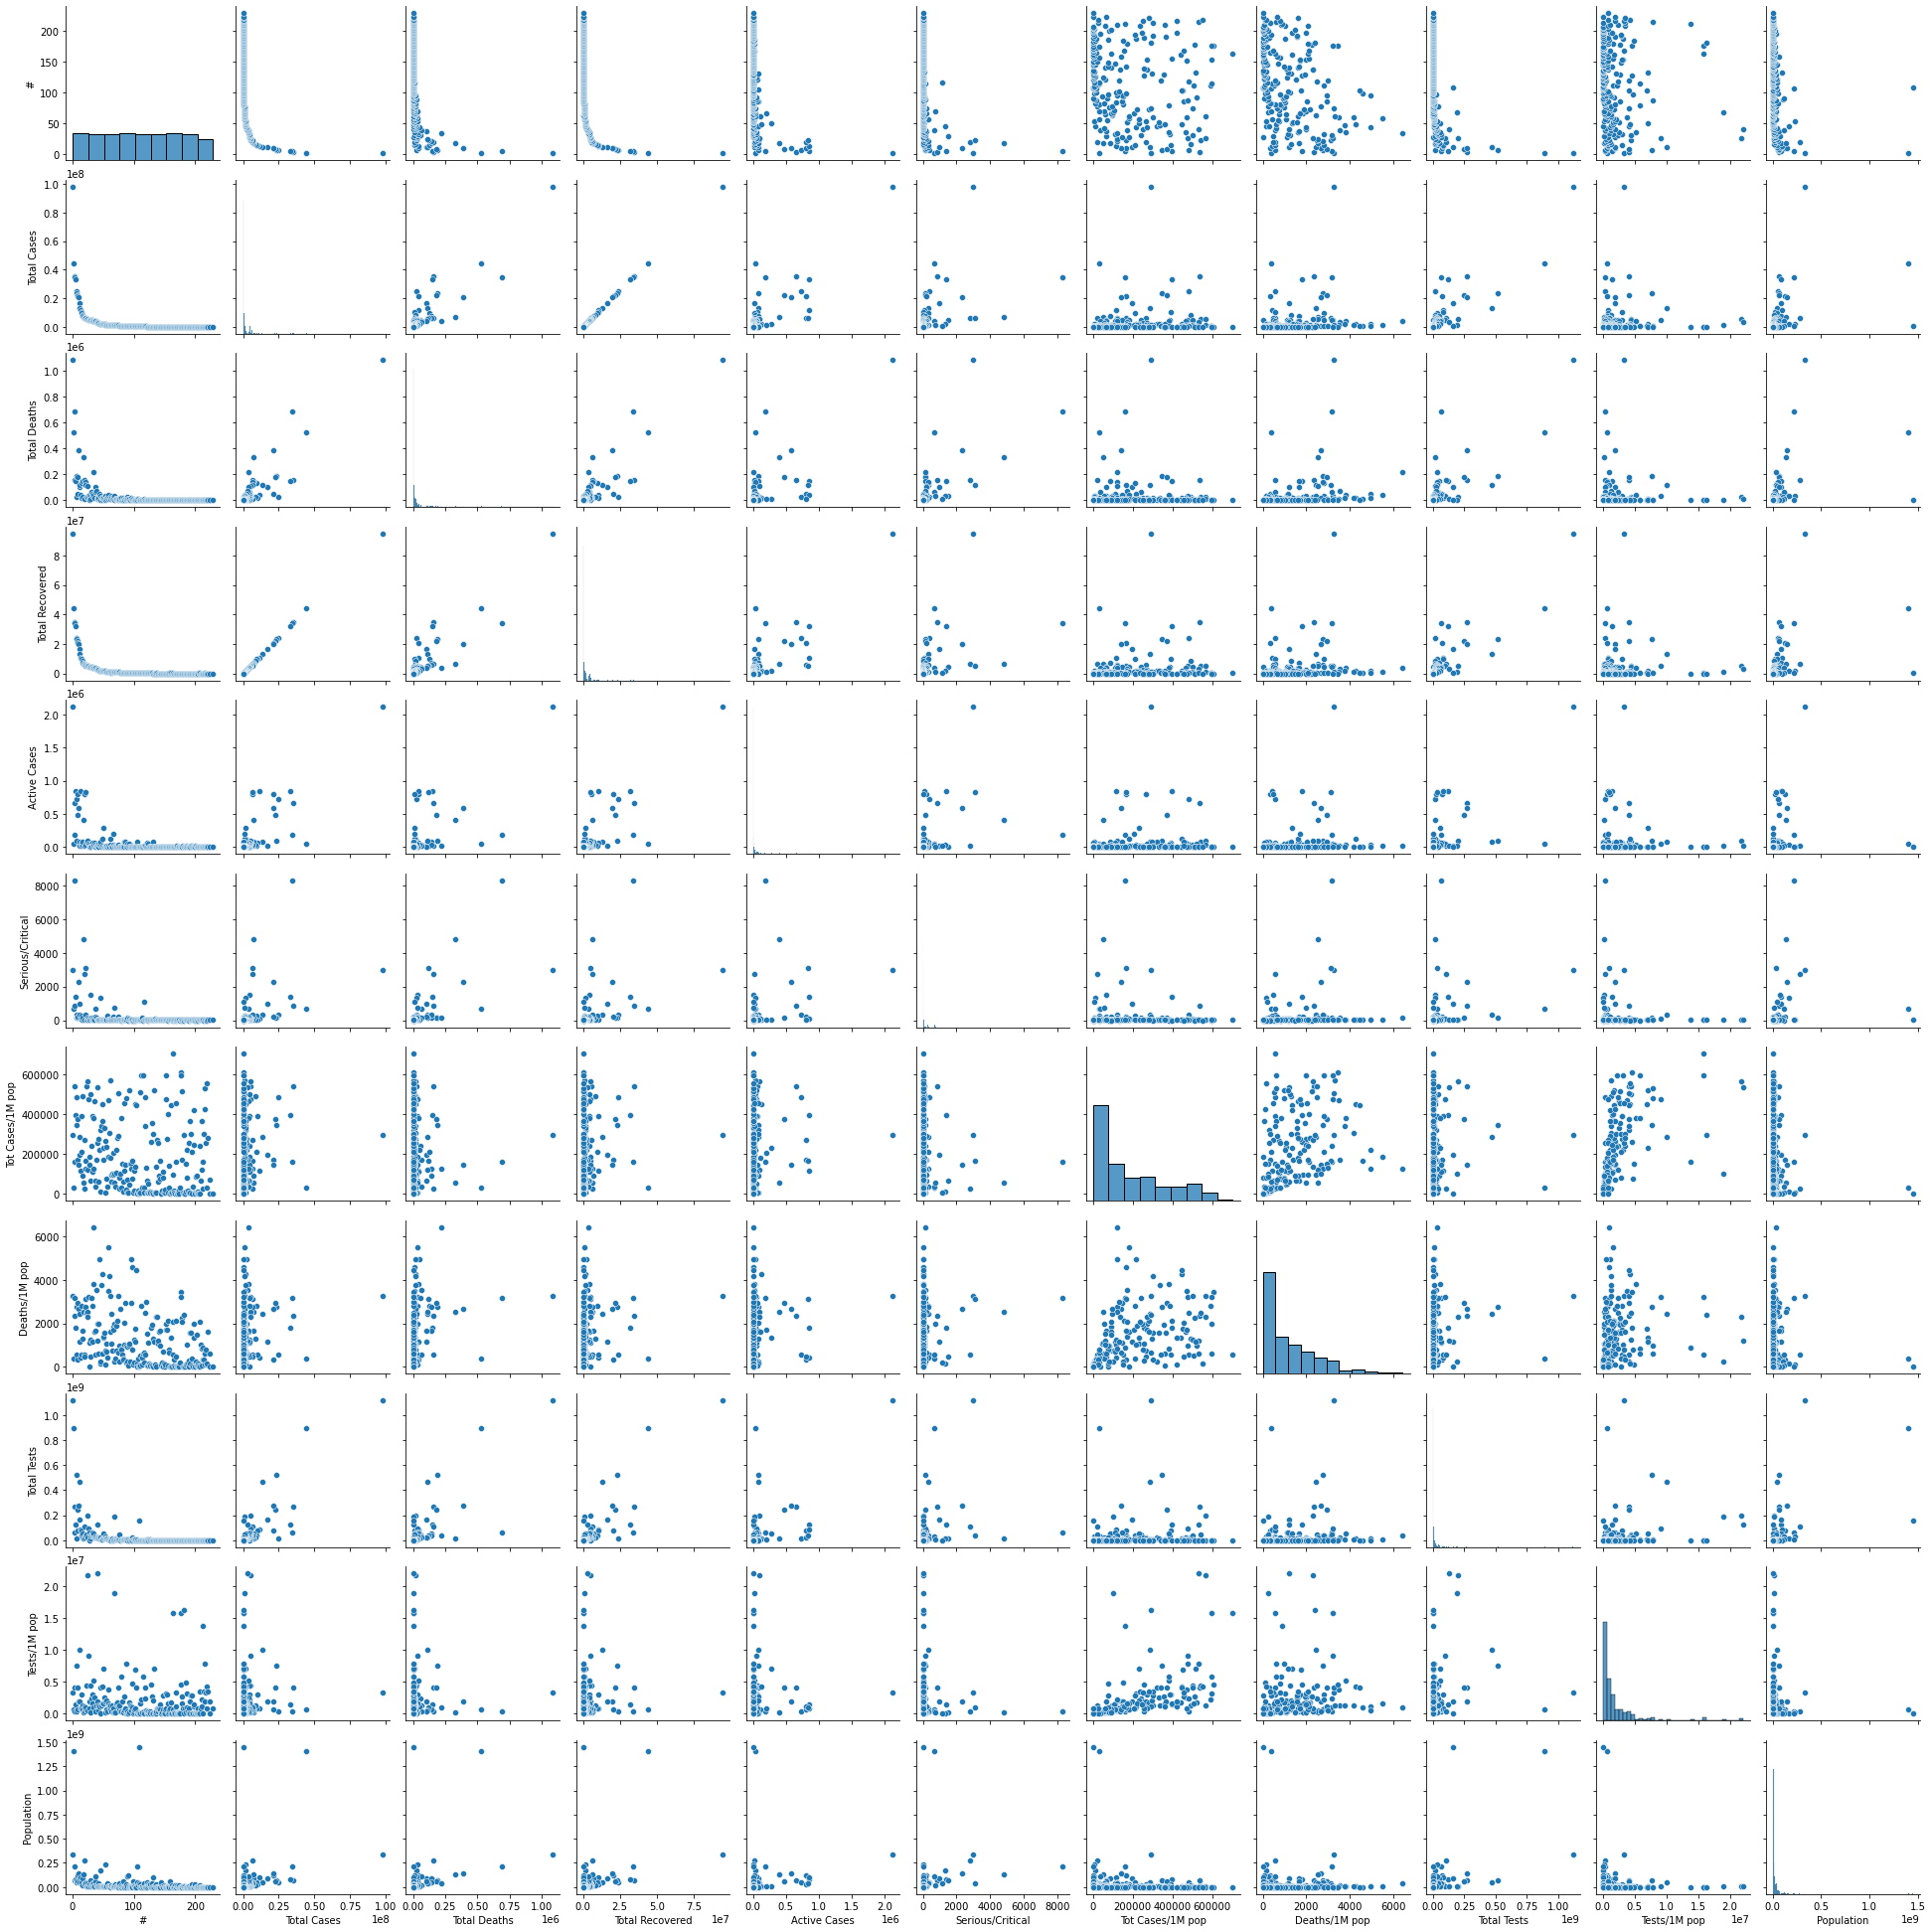

In [47]:
sns.pairplot(df)

<AxesSubplot:>

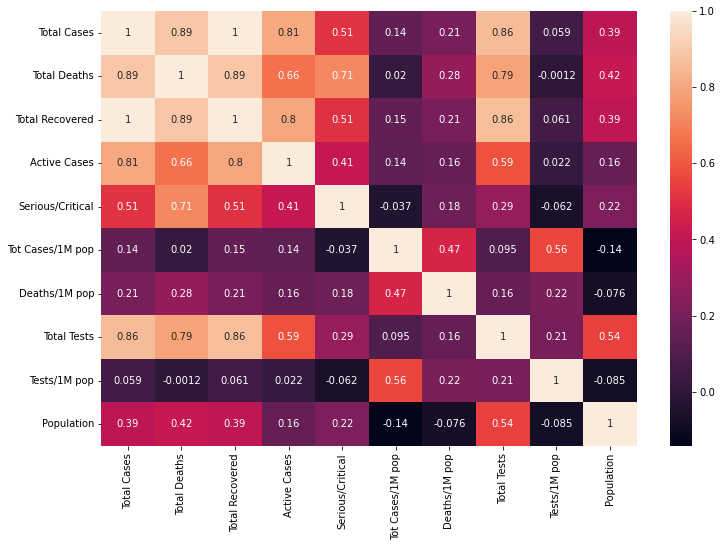

In [48]:
df =df.set_index('#')
corr = df.corr()
fig, ax = plt.subplots(figsize=(12 ,8))
sns.heatmap(corr,xticklabels = corr.columns, yticklabels = corr.columns
           ,annot = True)

Total Deaths percentile comparison with each country

In [51]:
fig = px.pie(df, values = 'Total Deaths',names='Country/Other', height=600, title='Total Deaths percentile of each country')
fig.update_traces(textposition='inside', textinfo='percent+label')

fig.update_layout(
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
    ))

fig.show()

# Conclusion:

Total Tests proportion comparison with each country

In [52]:
fig = px.treemap(df, 
                 path=['Country/Other'],
                 values = 'Total Tests',
                 names='Country/Other',
                 height=600,
                 title='Proportion of test cases',
                )

fig.show()

C:\ProgramData\Anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



# Conclusion:

Total Cases vs. Total Recovered with bubble size as Population

In [53]:
fig = px.scatter(df, x="Total Cases", y="Total Recovered", size="Population", color="Country/Other",
                 hover_name="Country/Other", log_x=True, size_max=60)
fig.show()

# Conclusion: